In [1]:
%pylab inline

import pandas as pd
import json
import sqlite3
import ast


Populating the interactive namespace from numpy and matplotlib


In [2]:
reviews = pd.DataFrame(json.loads(l) for l in open('/home/russ/Documents/DDL/Data/YelpData/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json'))

In [3]:
reviews['useful'] = reviews['votes'].apply(lambda v: v['useful'])

In [2]:
location_db = '/home/russ/Documents/DDL/Projects/03-censusables/databases/Censusables.db'
conn = sqlite3.connect(location_db)
reviews_db = pd.read_sql("SELECT * FROM 'Yelp.Reviews'", con=conn)

In [7]:
reviews_db.head(1)

,row_id,type,business_id,user_id,stars,text,date,votes
0,1,review,Xqd0DzHaiyRqVH3WRG7hzg,vcNAWiLM4dR7D2nwwJ7nCA,5,dr. goldberg offers everything i look for in a...,2007-05-17,"{u'funny': 0, u'useful': 2, u'cool': 1}"


In [26]:
import ast
def json_convert (v):
    d = json.loads(v)
    return d['useful']

my_dict = ast.literal_eval("{u'funny': 0, u'useful': 2, u'cool': 1}")
print my_dict['useful']
#reviews_db ['useful'] = reviews_db['votes'].apply(json_convert)

2


In [3]:
reviews_db['useful'] = reviews_db['votes'].apply(lambda v: ast.literal_eval(v)['useful'])

In [4]:
reviews.head(1)

,business_id,date,review_id,stars,text,type,user_id,votes,useful
0,vcNAWiLM4dR7D2nwwJ7nCA,2007-05-17,15SdjuK7DmYqUAj6rjGowg,5,dr. goldberg offers everything i look for in a...,review,Xqd0DzHaiyRqVH3WRG7hzg,"{u'funny': 0, u'useful': 2, u'cool': 1}",2


In [31]:
reviews_db.head(1)

,row_id,type,business_id,user_id,stars,text,date,votes,useful
0,1,review,Xqd0DzHaiyRqVH3WRG7hzg,vcNAWiLM4dR7D2nwwJ7nCA,5,dr. goldberg offers everything i look for in a...,2007-05-17,"{u'funny': 0, u'useful': 2, u'cool': 1}",2


In [4]:
ytract = pd.DataFrame(json.loads(l) for l in open('/home/russ/Documents/DDL/Data/YelpData/business_tract.json'))
business = pd.DataFrame(json.loads(l) for l in open('/home/russ/Documents/DDL/Data/YelpData/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json'))

In [3]:
business.head(1)

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type
0,{u'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{u'Thursday': {u'close': u'17:00', u'open': u'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,9,3.5,AZ,business


In [5]:
business = business.merge(ytract)

In [46]:
categories = {}
for d in (json.loads(l) for l in open('/home/russ/Documents/DDL/Data/YelpData/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json')):
    for c in d['categories']:
        if c in categories:
            categories[c] += 1
        else:
            categories[c] = 1


In [30]:
category_df = pd.DataFrame(categories.items(),columns=['Category','Count'])
category_df = category_df.sort('Count',ascending=False)
category_df

,Category,Count
31,Restaurants,21892
454,Shopping,8919
348,Food,7862
239,Beauty & Spas,4738
215,Nightlife,4340
663,Bars,3628
548,Health & Medical,3213
63,Automotive,2965
147,Home Services,2853
614,Fashion,2566


In [ ]:
category_df.to_csv('counts_by_category.csv')

In [11]:
"""cats = []
for ind, row in business.iterrows():
    #cats.append(dict(business_id = business['business_id'], category=c))
    print row
    break

#cats = pd.DataFrame(cats)   """

attributes                          {u'By Appointment Only': True}
business_id                                 vcNAWiLM4dR7D2nwwJ7nCA
categories                             [Doctors, Health & Medical]
city                                                       Phoenix
full_address     4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...
hours            {u'Thursday': {u'close': u'17:00', u'open': u'...
latitude                                                  33.49931
longitude                                                -111.9838
name                                             Eric Goldberg, MD
neighborhoods                                                   []
open                                                          True
review_count                                                     9
stars                                                          3.5
state                                                           AZ
type                                                      busi

In [93]:
"""def SeriesFromSubList(aList):
    return pd.Series(aList)


df_orgz = pd.concat(dict([ (ind,row.apply(SeriesFromSubList)) for ind,row in business.iterrows() ]))"""

'def SeriesFromSubList(aList):\n    return pd.Series(aList)\n\n\ndf_orgz = pd.concat(dict([ (ind,row.apply(SeriesFromSubList)) for ind,row in business.iterrows() ]))'

In [6]:
#Create BusinessID by Individual Category
cats = []
for d in (json.loads(l) for l in open('/home/russ/Documents/DDL/Data/YelpData/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json')):
    for c in d['categories']:
        cats.append(dict(business_id = d['business_id'], category=c))
cats = pd.DataFrame(cats)

In [9]:
cat_lookup = pd.read_csv('/home/russ/Documents/DDL/Data/YelpData/counts_by_category_recat.csv', header=0, usecols=['Category','Count','New'])
cat_lookup.columns = ['OldCategory','Count','Category']

In [6]:
cat_lookup.head(1)

,OldCategory,Count,Category
0,Restaurants,21892,Restaurants


In [10]:
cat_combined = pd.merge(cat_lookup[['OldCategory','Count']], cat_lookup[['OldCategory','Category']],left_on='OldCategory', right_on='Category')

In [9]:
cat_combined.head(3)

,OldCategory_x,Count,OldCategory_y,Category
0,Restaurants,21892,Restaurants,Restaurants
1,Restaurants,21892,Food,Restaurants
2,Restaurants,21892,Pizza,Restaurants


In [11]:
cat_combined.drop(['OldCategory_x'],axis=1, inplace=True)
cat_combined.columns = ['Count','OldCategory','Category']
cat_combined

,Count,OldCategory,Category
0,21892,Restaurants,Restaurants
1,21892,Food,Restaurants
2,21892,Pizza,Restaurants
3,21892,Mexican,Restaurants
4,21892,American (Traditional),Restaurants
5,21892,Sandwiches,Restaurants
6,21892,Coffee & Tea,Restaurants
7,21892,Italian,Restaurants
8,21892,Chinese,Restaurants
9,21892,American (New),Restaurants


In [ ]:
#cats = cats.merge(ytract)

#counts_by_geocat.to_csv('counts_by_geocat.csv')

In [12]:
business_category_count = pd.merge (cats[['business_id','category']],cat_combined[['OldCategory','Category','Count']],left_on='category',right_on='OldCategory').sort(['Count','OldCategory'],ascending=[0,1])

In [13]:
business_category_count.drop(['category'],axis=1,inplace=True)

In [14]:
business_category_count

,business_id,OldCategory,Category,Count
171030,0pXk2JkijBpi2Iz0D5pFXA,Afghan,Restaurants,21892
171031,vt0zrlzlHOcvXZsZ0Y-D_g,Afghan,Restaurants,21892
171032,s5yYbHcxvHnNyHF7uVNUbg,Afghan,Restaurants,21892
171033,uR96BDuI8YR7gqbc-Ncg9A,Afghan,Restaurants,21892
171034,9qi6ZfYzjGuwEzQ_FtBBgw,Afghan,Restaurants,21892
171035,pvMeUi5Lw2O5vIXg9_EvDg,Afghan,Restaurants,21892
171036,saON8-nDZi5W64u1xGtmPA,Afghan,Restaurants,21892
171037,VH2sLFMP8gWQm0skMZqaVw,Afghan,Restaurants,21892
171038,mFcB-ohmJIi1xuZadKbuww,Afghan,Restaurants,21892
171039,TZhv0cOt0UHoORlG0I5JHg,Afghan,Restaurants,21892


In [171]:
#business_grouping = business_category_count[['business_id','Category','Count']].groupby(['business_id','Category']).max()

In [182]:
#business_grouping

In [74]:
business_category_count[business_category_count['business_id'] == '--1emggGHgoG6ipd_RMb-g']

,business_id,OldCategory,Category,Count
67077,--1emggGHgoG6ipd_RMb-g,Food,Restaurants,21892
153290,--1emggGHgoG6ipd_RMb-g,Convenience Stores,Convenience Stores,578


In [16]:
business_category_count.groupby('business_id').apply(lambda t: t[t.Count==t.Count.max()])

business_id  \
business_id                                             
--1emggGHgoG6ipd_RMb-g 67077   --1emggGHgoG6ipd_RMb-g   
--4Pe8BZ6gj57VFL5mUE8g 139801  --4Pe8BZ6gj57VFL5mUE8g   
                       16332   --4Pe8BZ6gj57VFL5mUE8g   
--5jkZ3-nUPZxUvtcbr8Uw 136920  --5jkZ3-nUPZxUvtcbr8Uw   
                       131648  --5jkZ3-nUPZxUvtcbr8Uw   
                       45339   --5jkZ3-nUPZxUvtcbr8Uw   
--7PRjnsjMA6uhPK8mW13Q 4337    --7PRjnsjMA6uhPK8mW13Q   
--BlvDO_RG2yElKu9XA1_g 81852   --BlvDO_RG2yElKu9XA1_g   
                       166938  --BlvDO_RG2yElKu9XA1_g   
                       44644   --BlvDO_RG2yElKu9XA1_g   
                       137660  --BlvDO_RG2yElKu9XA1_g   
--Dl2rW_xO8GuYBomlg9zw 3120    --Dl2rW_xO8GuYBomlg9zw   
                       161866  --Dl2rW_xO8GuYBomlg9zw   
--NCcmQqh_NZbjW1S5XsGQ 66086   --NCcmQqh_NZbjW1S5XsGQ   
--Ol5mVSMaW8ExtmWRUmKA 114567  --Ol5mVSMaW8ExtmWRUmKA   
--UE_y6auTgq3FXlvUMkbw 134041  --UE_y6auTgq3FXlvUMkbw   
                       29725   --UE_y6auTgq3FXlvUMkbw   
--WLj8iK9DUKxkPnMHAoeA 74053   --WLj8iK9DUKxkPnMHAoeA   
--XBxRlD92RaV6TyUnP8Ow 13386   --XBxRlD92RaV6TyUnP8Ow   
--Y_2lDOtVDioX5bwF6GIw 144256  --Y_2lDOtVDioX5bwF6GIw   
                       47846   --Y_2lDOtVDioX5bwF6GIw   
--jFTZmywe7StuZ2hEjxyA 36461   --jFTZmywe7StuZ2hEjxyA   
                       103601  --jFTZmywe7StuZ2hEjxyA   
--m1g9P1wxNblrLANfVqlA 16152   --m1g9P1wxNblrLANfVqlA   
--nQiUBxtpjd_ZBuO_PH6w 165054  --nQiUBxtpjd_ZBuO_PH6w   
                       79295   --nQiUBxtpjd_ZBuO_PH6w   
--pOlFxITWnhzc7SHSIP0A 29288   --pOlFxITWnhzc7SHSIP0A   
                       48371   --pOlFxITWnhzc7SHSIP0A   
--qeSYxyn62mMjWvznNTdg 81286   --qeSYxyn62mMjWvznNTdg   
                       35768   --qeSYxyn62mMjWvznNTdg   
...                                               ...   
zzUUj9BUNn0_0F5hwy7RRw 81744   zzUUj9BUNn0_0F5hwy7RRw   
                       42846   zzUUj9BUNn0_0F5hwy7RRw   
zzW_Gu-O5UpieKKp0Vd_bQ 108872  zzW_Gu-O5UpieKKp0Vd_bQ   
                       12593   zzW_Gu-O5UpieKKp0Vd_bQ   
zzZizlQn7Wfi-tFG9OiJ9w 74369   zzZizlQn7Wfi-tFG9OiJ9w   
zze1eI588TqdJLs8xOzMxw 64397   zze1eI588TqdJLs8xOzMxw   
zzgXEteMduykqN8JAUG4CA 29137   zzgXEteMduykqN8JAUG4CA   
                       89814   zzgXEteMduykqN8JAUG4CA   
                       66555   zzgXEteMduykqN8JAUG4CA   
                       46734   zzgXEteMduykqN8JAUG4CA   
zzhSCOVTZ7MUKOAfwT-Bsw 11596   zzhSCOVTZ7MUKOAfwT-Bsw   
zzhykRiQh2FyrYEPMfBw0A 156452  zzhykRiQh2FyrYEPMfBw0A   
                       108944  zzhykRiQh2FyrYEPMfBw0A   
                       18107   zzhykRiQh2FyrYEPMfBw0A   
zzhzW3DImwhSwpcK1Yuy7Q 60067   zzhzW3DImwhSwpcK1Yuy7Q   
                       89383   zzhzW3DImwhSwpcK1Yuy7Q   
                       65022   zzhzW3DImwhSwpcK1Yuy7Q   
                       43030   zzhzW3DImwhSwpcK1Yuy7Q   
zzlpdQ2GPcXj7mo0lut3Vg 150444  zzlpdQ2GPcXj7mo0lut3Vg   
                       17975   zzlpdQ2GPcXj7mo0lut3Vg   
zzrm5HEoYKEsfdi8XxSXuQ 388     zzrm5HEoYKEsfdi8XxSXuQ   
                       160718  zzrm5HEoYKEsfdi8XxSXuQ   
                       2015    zzrm5HEoYKEsfdi8XxSXuQ   
zzs-gtrsGyu2_o8L6vpaIQ 79546   zzs-gtrsGyu2_o8L6vpaIQ   
                       80286   zzs-gtrsGyu2_o8L6vpaIQ   
                       1296    zzs-gtrsGyu2_o8L6vpaIQ   
zztd3r04hvMTZh3ol7VC4g 69800   zztd3r04hvMTZh3ol7VC4g   
                       38764   zztd3r04hvMTZh3ol7VC4g   
zzucnDH33KlmbkI4rLyQTA 11755   zzucnDH33KlmbkI4rLyQTA   
                       109004  zzucnDH33KlmbkI4rLyQTA   

                                             OldCategory  \
business_id                                                
--1emggGHgoG6ipd_RMb-g 67077                        Food   
--4Pe8BZ6gj57VFL5mUE8g 139801           Office Equipment   
                       16332                    Shopping   
--5jkZ3-nUPZxUvtcbr8Uw 136920                      Greek   
                       131648              Mediterranean   
                       45339  

In [17]:
#Get record that has the Max Count of each business_id group
business_new_cat = business_category_count[['business_id','Category','Count']].groupby('business_id').apply(lambda t: t[t.Count==t.Count.max()])

In [18]:
#Drop Duplicates
business_new_cat[['business_id','Category']].drop_duplicates()

,,business_id,Category
business_id,,,
--1emggGHgoG6ipd_RMb-g,67077,--1emggGHgoG6ipd_RMb-g,Restaurants
--4Pe8BZ6gj57VFL5mUE8g,139801,--4Pe8BZ6gj57VFL5mUE8g,Shopping
--5jkZ3-nUPZxUvtcbr8Uw,136920,--5jkZ3-nUPZxUvtcbr8Uw,Restaurants
--7PRjnsjMA6uhPK8mW13Q,4337,--7PRjnsjMA6uhPK8mW13Q,Nightlife
--BlvDO_RG2yElKu9XA1_g,81852,--BlvDO_RG2yElKu9XA1_g,Restaurants
--Dl2rW_xO8GuYBomlg9zw,3120,--Dl2rW_xO8GuYBomlg9zw,Health & Medical
--NCcmQqh_NZbjW1S5XsGQ,66086,--NCcmQqh_NZbjW1S5XsGQ,Restaurants
--Ol5mVSMaW8ExtmWRUmKA,114567,--Ol5mVSMaW8ExtmWRUmKA,Beauty & Spas
--UE_y6auTgq3FXlvUMkbw,134041,--UE_y6auTgq3FXlvUMkbw,Restaurants


In [19]:
business_cat_dedup = business_new_cat[['business_id','Category']].drop_duplicates()

In [20]:
business_cat_dedup[business_cat_dedup['business_id'] == 'rgSSCx0tb9AQyCkAvMSIoQ']

,,business_id,Category
business_id,,,
rgSSCx0tb9AQyCkAvMSIoQ,170917,rgSSCx0tb9AQyCkAvMSIoQ,Restaurants


In [77]:
#TESTING UNSTACK
business_cat_dedup.unstack(level=0)

MemoryError: 

In [21]:
business = business.merge(ytract)

In [23]:
business = business.merge(business_cat_dedup)

In [25]:
business.head(1)

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,GISJOIN,Category
0,{u'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{u'Thursday': {u'close': u'17:00', u'open': u'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,9,3.5,AZ,business,G0400130108200,Health & Medical


In [26]:
cat_count = business[['business_id','Category']].groupby(['Category']).count()

In [27]:
cat_count

,business_id
Category,
Active Life,1952
Arts & Crafts,89
Automotive,2889
Bars,6
Beauty & Spas,4048
Education,255
Event Planning & Services,1418
Financial Services,407
Health & Medical,2519


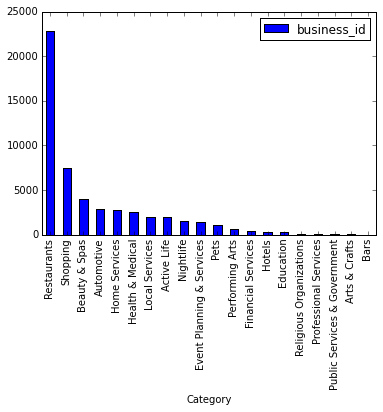

In [28]:
cat_count.sort('business_id',ascending=False).plot(kind='bar')

In [29]:
business.head(1)

,attributes,business_id,categories,city,full_address,hours,latitude,longitude,name,neighborhoods,open,review_count,stars,state,type,GISJOIN,Category
0,{u'By Appointment Only': True},vcNAWiLM4dR7D2nwwJ7nCA,"[Doctors, Health & Medical]",Phoenix,"4840 E Indian School Rd\nSte 101\nPhoenix, AZ ...","{u'Thursday': {u'close': u'17:00', u'open': u'...",33.499313,-111.983758,"Eric Goldberg, MD",[],True,9,3.5,AZ,business,G0400130108200,Health & Medical


In [78]:
reviews.head(1)

,business_id,date,review_id,stars,text,type,user_id,votes
0,vcNAWiLM4dR7D2nwwJ7nCA,2007-05-17,15SdjuK7DmYqUAj6rjGowg,5,dr. goldberg offers everything i look for in a...,review,Xqd0DzHaiyRqVH3WRG7hzg,"{u'funny': 0, u'useful': 2, u'cool': 1}"


In [30]:
business[['business_id','GISJOIN','Category','open']].merge(reviews[['business_id', 'date','stars','useful']])

,business_id,GISJOIN,Category,open,date,stars,useful
0,vcNAWiLM4dR7D2nwwJ7nCA,G0400130108200,Health & Medical,True,2007-05-17,5,2
1,vcNAWiLM4dR7D2nwwJ7nCA,G0400130108200,Health & Medical,True,2010-03-22,2,2
2,vcNAWiLM4dR7D2nwwJ7nCA,G0400130108200,Health & Medical,True,2012-02-14,4,1
3,vcNAWiLM4dR7D2nwwJ7nCA,G0400130108200,Health & Medical,True,2012-03-02,4,0
4,vcNAWiLM4dR7D2nwwJ7nCA,G0400130108200,Health & Medical,True,2012-05-15,4,2
5,vcNAWiLM4dR7D2nwwJ7nCA,G0400130108200,Health & Medical,True,2013-04-19,1,0
6,vcNAWiLM4dR7D2nwwJ7nCA,G0400130108200,Health & Medical,True,2014-01-02,5,0
7,vcNAWiLM4dR7D2nwwJ7nCA,G0400130108200,Health & Medical,True,2014-01-08,5,0
8,vcNAWiLM4dR7D2nwwJ7nCA,G0400130108200,Health & Medical,True,2014-08-01,1,1
9,vcNAWiLM4dR7D2nwwJ7nCA,G0400130108200,Health & Medical,True,2014-12-12,5,0


In [31]:
geo_review = business[['business_id','GISJOIN','Category','open']].merge(reviews[['business_id', 'date','stars','useful']])

In [ ]:
#review_cats = reviews[['business_id', 'stars', 'useful']].merge(cats)

In [37]:
business_review_years = geo_review[['business_id','date']].groupby('business_id').agg({'date': [np.min,np.max]})

In [69]:
business_review_years

date             years
                              amin        amax      
business_id                                         
--1emggGHgoG6ipd_RMb-g  2013-03-30  2014-06-13   NaN
--4Pe8BZ6gj57VFL5mUE8g  2009-01-13  2014-07-31   NaN
--5jkZ3-nUPZxUvtcbr8Uw  2011-07-31  2014-12-27   NaN
--7PRjnsjMA6uhPK8mW13Q  2010-10-22  2013-11-17   NaN
--BlvDO_RG2yElKu9XA1_g  2011-02-13  2014-12-04   NaN
--Dl2rW_xO8GuYBomlg9zw  2010-05-04  2012-10-31   NaN
--Ol5mVSMaW8ExtmWRUmKA  2010-04-10  2014-11-17   NaN
--UE_y6auTgq3FXlvUMkbw  2007-09-10  2015-01-08   NaN
--WLj8iK9DUKxkPnMHAoeA  2013-02-25  2014-11-18   NaN
--XBxRlD92RaV6TyUnP8Ow  2009-04-22  2014-09-27   NaN
--Y_2lDOtVDioX5bwF6GIw  2012-12-06  2014-11-20   NaN
--jFTZmywe7StuZ2hEjxyA  2012-10-24  2014-08-11   NaN
--nQiUBxtpjd_ZBuO_PH6w  2014-09-25  2014-11-05   NaN
--pOlFxITWnhzc7SHSIP0A  2013-03-18  2015-01-08   NaN
--qeSYxyn62mMjWvznNTdg  2011-05-14  2013-11-02   NaN
--sSW-WY3vyASh_eVPGUAw  2010-09-09  2014-04-30   NaN
--zgHBiQpr8H2ZqSdGmguQ  2009-04-10  2011-12-11   NaN
-05qMWbhAtrD6EiV-UElPg  2012-03-24  2014-07-31   NaN
-0Ackw6MF82PXO9f9Jh_Kg  2009-05-24  2014-03-24   NaN
-0D_CYhlD2ILkmLR0pBmnA  2011-07-29  2014-06-06   NaN
-0GkcDiIgVm0XzDZC8RFOg  2006-04-21  2014-11-30   NaN
-0HGqwlfw3I8nkJyMHxAsQ  2014-02-10  2014-12-01   NaN
-0QBrNvhrPQCaeo7mTo0zQ  2011-06-26  2012-11-29   NaN
-0VK5Z1BfUHUYq4PoBYNLw  2013-11-08  2014-10-24   NaN
-0ZDRoepf3gwd9fpsw1bRQ  2009-05-07  2014-12-06   NaN
-0bUDim5OGuv8R0Qqq6J4A  2010-03-16  2012-12-03   NaN
-0lOuL7RkZQnjAl96dXTvA  2014-05-16  2014-12-16   NaN
-0lRv242OzyPUB8c5E_UhQ  2011-06-07  2014-03-13   NaN
-0xwm_AwS0d_5rwUprHGuw  2008-07-04  2014-11-16   NaN
-1B-DEGkLE1kDj5ENAF2NQ  2011-06-23  2015-01-04   NaN
...                            ...         ...   ...
zxjMiqlfUuIQRltSuj9FpQ  2009-05-13  2014-12-19   NaN
zxo9nZwhlW1ZM7OUJP_1ag  2011-07-25  2014-10-16   NaN
zxodsuIjtv3kx8mNa3sptQ  2008-08-23  2014-12-27   NaN
zxqvU415r_RtZRKDtdbIKQ  2006-01-11  2015-01-07   NaN
zxviVY0ypMZMkZDfE0Ffqw  2012-09-11  2015-01-05   NaN
zxzoq5E2-r4e26kXgoierg  2014-01-24  2014-12-31   NaN
zyCrtvCPdSZDhUrH86vbeA  2009-03-03  2014-07-31   NaN
zyD03W9T-raaNmoEdodFQA  2014-06-08  2014-06-19   NaN
zyFZme7L_6kfvex2sgPfCA  2010-12-23  2011-09-15   NaN
zyI8_HQPEwkJ22WMb9ILVQ  2007-07-31  2014-12-01   NaN
zyIELEt6zTdBvGgxReq86A  2013-12-01  2014-06-08   NaN
zyV7n8eXVTAtJrryRswHvA  2013-07-03  2015-01-06   NaN
zyYRWnimLbQt9aCCI_2MZw  2010-04-02  2012-10-15   NaN
zyZ883vct64bKzNv4wy6Yg  2009-10-01  2014-12-30   NaN
zyjyDSdyw0eUqxAWnM_fdA  2013-04-15  2013-09-17   NaN
zypmytGA92yk45AYn60ZHw  2011-05-22  2014-08-12   NaN
zyvujnBGGpG3WWiDPkil9w  2013-11-21  2015-01-02   NaN
zz4HioU_qObV2kuOsIMUhw  2011-03-02  2014-03-10   NaN
zz5eC4ux3D8AOrKKYCU0YA  2010-05-22  2014-12-07   NaN
zzIP8b0fpMEacKp5KzuLrA  2011-07-05  2014-11-09   NaN
zzK7j06Pg8YWkQHzgsTuQA  2011-10-08  2014-11-30   NaN
zzW_Gu-O5UpieKKp0Vd_bQ  2012-10-14  2014-09-22   NaN
zzZizlQn7Wfi-tFG9OiJ9w  2011-02-26  2011-05-22   NaN
zze1eI588TqdJLs8xOzMxw  2011-04-05  2012-01-30   NaN
zzgXEteMduykqN8JAUG4CA  2012-12-09  2014-12-30   NaN
zzhSCOVTZ7MUKOAfwT-Bsw  2011-04-03  2013-05-01   NaN
zzhykRiQh2FyrYEPMfBw0A  2011-05-29  2014-10-13   NaN
zzrm5HEoYKEsfdi8XxSXuQ  2010-10-12  2014-06-16   NaN
zzs-gtrsGyu2_o8L6vpaIQ  2010-11-04  2014-11-06   NaN
zzucnDH33KlmbkI4rLyQTA  2008-11-05  2014-12-29   NaN

[52392 rows x 3 columns]

In [ ]:
review_cats['wstars'] = review_cats.stars * (review_cats.useful + 1)

In [73]:
#reviews['useful'] = reviews['votes'].apply(lambda v: v['useful'])
business_review_years['years'] = business_review_years[['date']].stack(level=0)[['amax']]
#business_review_years[['date']].stack(level=0)[['amin','amax']]
#business_review_years.stack(level=0)[['amin']]

TypeError: incompatible index of inserted column with frame index

In [66]:
business_review_years

date             years
                              amin        amax      
business_id                                         
--1emggGHgoG6ipd_RMb-g  2013-03-30  2014-06-13   NaN
--4Pe8BZ6gj57VFL5mUE8g  2009-01-13  2014-07-31   NaN
--5jkZ3-nUPZxUvtcbr8Uw  2011-07-31  2014-12-27   NaN
--7PRjnsjMA6uhPK8mW13Q  2010-10-22  2013-11-17   NaN
--BlvDO_RG2yElKu9XA1_g  2011-02-13  2014-12-04   NaN
--Dl2rW_xO8GuYBomlg9zw  2010-05-04  2012-10-31   NaN
--Ol5mVSMaW8ExtmWRUmKA  2010-04-10  2014-11-17   NaN
--UE_y6auTgq3FXlvUMkbw  2007-09-10  2015-01-08   NaN
--WLj8iK9DUKxkPnMHAoeA  2013-02-25  2014-11-18   NaN
--XBxRlD92RaV6TyUnP8Ow  2009-04-22  2014-09-27   NaN
--Y_2lDOtVDioX5bwF6GIw  2012-12-06  2014-11-20   NaN
--jFTZmywe7StuZ2hEjxyA  2012-10-24  2014-08-11   NaN
--nQiUBxtpjd_ZBuO_PH6w  2014-09-25  2014-11-05   NaN
--pOlFxITWnhzc7SHSIP0A  2013-03-18  2015-01-08   NaN
--qeSYxyn62mMjWvznNTdg  2011-05-14  2013-11-02   NaN
--sSW-WY3vyASh_eVPGUAw  2010-09-09  2014-04-30   NaN
--zgHBiQpr8H2ZqSdGmguQ  2009-04-10  2011-12-11   NaN
-05qMWbhAtrD6EiV-UElPg  2012-03-24  2014-07-31   NaN
-0Ackw6MF82PXO9f9Jh_Kg  2009-05-24  2014-03-24   NaN
-0D_CYhlD2ILkmLR0pBmnA  2011-07-29  2014-06-06   NaN
-0GkcDiIgVm0XzDZC8RFOg  2006-04-21  2014-11-30   NaN
-0HGqwlfw3I8nkJyMHxAsQ  2014-02-10  2014-12-01   NaN
-0QBrNvhrPQCaeo7mTo0zQ  2011-06-26  2012-11-29   NaN
-0VK5Z1BfUHUYq4PoBYNLw  2013-11-08  2014-10-24   NaN
-0ZDRoepf3gwd9fpsw1bRQ  2009-05-07  2014-12-06   NaN
-0bUDim5OGuv8R0Qqq6J4A  2010-03-16  2012-12-03   NaN
-0lOuL7RkZQnjAl96dXTvA  2014-05-16  2014-12-16   NaN
-0lRv242OzyPUB8c5E_UhQ  2011-06-07  2014-03-13   NaN
-0xwm_AwS0d_5rwUprHGuw  2008-07-04  2014-11-16   NaN
-1B-DEGkLE1kDj5ENAF2NQ  2011-06-23  2015-01-04   NaN
...                            ...         ...   ...
zxjMiqlfUuIQRltSuj9FpQ  2009-05-13  2014-12-19   NaN
zxo9nZwhlW1ZM7OUJP_1ag  2011-07-25  2014-10-16   NaN
zxodsuIjtv3kx8mNa3sptQ  2008-08-23  2014-12-27   NaN
zxqvU415r_RtZRKDtdbIKQ  2006-01-11  2015-01-07   NaN
zxviVY0ypMZMkZDfE0Ffqw  2012-09-11  2015-01-05   NaN
zxzoq5E2-r4e26kXgoierg  2014-01-24  2014-12-31   NaN
zyCrtvCPdSZDhUrH86vbeA  2009-03-03  2014-07-31   NaN
zyD03W9T-raaNmoEdodFQA  2014-06-08  2014-06-19   NaN
zyFZme7L_6kfvex2sgPfCA  2010-12-23  2011-09-15   NaN
zyI8_HQPEwkJ22WMb9ILVQ  2007-07-31  2014-12-01   NaN
zyIELEt6zTdBvGgxReq86A  2013-12-01  2014-06-08   NaN
zyV7n8eXVTAtJrryRswHvA  2013-07-03  2015-01-06   NaN
zyYRWnimLbQt9aCCI_2MZw  2010-04-02  2012-10-15   NaN
zyZ883vct64bKzNv4wy6Yg  2009-10-01  2014-12-30   NaN
zyjyDSdyw0eUqxAWnM_fdA  2013-04-15  2013-09-17   NaN
zypmytGA92yk45AYn60ZHw  2011-05-22  2014-08-12   NaN
zyvujnBGGpG3WWiDPkil9w  2013-11-21  2015-01-02   NaN
zz4HioU_qObV2kuOsIMUhw  2011-03-02  2014-03-10   NaN
zz5eC4ux3D8AOrKKYCU0YA  2010-05-22  2014-12-07   NaN
zzIP8b0fpMEacKp5KzuLrA  2011-07-05  2014-11-09   NaN
zzK7j06Pg8YWkQHzgsTuQA  2011-10-08  2014-11-30   NaN
zzW_Gu-O5UpieKKp0Vd_bQ  2012-10-14  2014-09-22   NaN
zzZizlQn7Wfi-tFG9OiJ9w  2011-02-26  2011-05-22   NaN
zze1eI588TqdJLs8xOzMxw  2011-04-05  2012-01-30   NaN
zzgXEteMduykqN8JAUG4CA  2012-12-09  2014-12-30   NaN
zzhSCOVTZ7MUKOAfwT-Bsw  2011-04-03  2013-05-01   NaN
zzhykRiQh2FyrYEPMfBw0A  2011-05-29  2014-10-13   NaN
zzrm5HEoYKEsfdi8XxSXuQ  2010-10-12  2014-06-16   NaN
zzs-gtrsGyu2_o8L6vpaIQ  2010-11-04  2014-11-06   NaN
zzucnDH33KlmbkI4rLyQTA  2008-11-05  2014-12-29   NaN

[52392 rows x 3 columns]

In [ ]:
stars_by_geocat = review_cats[['stars']].groupby([review_cats.category, review_cats.GISJOIN]).mean()
stars_by_geocat = stars_by_geocat.unstack(level=0).dropna(how='all').dropna(axis=1, thresh=99)
stars_by_geocat.columns = stars_by_geocat.columns.get_level_values(1)
stars_by_geocat.reset_index(inplace=True)
stars_by_geocat.to_csv('stars_by_geocat.csv')

wstars_by_geocat = review_cats[['wstars']].groupby([review_cats.category, review_cats.GISJOIN]).mean()
wstars_by_geocat = wstars_by_geocat.unstack(level=0).dropna(how='all').dropna(axis=1, thresh=99)
wstars_by_geocat.columns = wstars_by_geocat.columns.get_level_values(1)
wstars_by_geocat.reset_index(inplace=True)
wstars_by_geocat.to_csv('wstars_by_geocat.csv')

counts_by_geocat = cats[['business_id']].groupby([cats.category, cats.GISJOIN]).count()
counts_by_geocat.columns = ['business_count']
counts_by_geocat = counts_by_geocat.unstack(level=0).dropna(how='all').dropna(axis=1, thresh=99)
counts_by_geocat.columns = counts_by_geocat.columns.get_level_values(1)
counts_by_geocat.reset_index(inplace=True)
counts_by_geocat.to_csv('counts_by_geocat.csv')

In [ ]:
data = pandas.read_csv('/home/russ/Documents/DDL/ACS-5/nhgis0002_csv/nhgis0002_ds201_20135_2013_tract.csv', skiprows=[1])

In [ ]:
data['pc_income'] = data['UJAE001']
data['employed_percent'] = data['UJ8E002'] / data['UJ8E001']
data['median_age'] = data['UEFE001']
data['median_gross_rent'] = data['UL9E001']
data['median_family_income'] = data['UINE001']
econ = data[['GISJOIN', 'pc_income', 'employed_percent', 'median_age', 'median_gross_rent', 'median_family_income']]

In [ ]:
wcorrs = econ.merge(wstars_by_geocat).corr().unstack().reset_index()
wcorrs.columns = ['econ', 'cat', 'r']
wcorrs = wcorrs[wcorrs.econ.apply(lambda e: e.islower())]
wcorrs = wcorrs[wcorrs.cat.apply(lambda e: not e.islower())]
wcorrs[wcorrs.r.apply(lambda v: abs(v) > .3)]

In [ ]:
scorrs = econ.merge(stars_by_geocat).corr().unstack().reset_index()
scorrs.columns = ['econ', 'cat', 'r']
scorrs = scorrs[scorrs.econ.apply(lambda e: e.islower())]
scorrs = scorrs[scorrs.cat.apply(lambda e: not e.islower())]
scorrs[scorrs.r.apply(lambda v: abs(v) > .3)]

In [ ]:
ccorrs = econ.merge(counts_by_geocat).corr().unstack().reset_index()
ccorrs.columns = ['econ', 'cat', 'r']
ccorrs = ccorrs[ccorrs.econ.apply(lambda e: e.islower())]
ccorrs = ccorrs[ccorrs.cat.apply(lambda e: not e.islower())]
ccorrs[ccorrs.r.apply(lambda v: abs(v) > .3)]